# 90°剥離試験の解析


 70dC 
         0       1       2        3        4
0   0.000  30.070  72.570  143.700  196.620
1  68.090  62.060  55.340   95.410   70.620
2   4.747   2.256   3.426    5.377   10.576
[0.         0.07166185 0.07577767 0.12561561 0.17132949]

 80dC 
         0        1       2        3
0    0.00   58.700  107.07  325.230
1  203.47  119.780  120.17   98.470
2    3.57    1.788    1.77    4.318
[0.         0.01356119 0.01352977 0.02285752]

 90dC 
        0       1        2        3
0   0.00  25.480  113.820  166.630
1  54.79  86.590  166.690  132.690
2   4.49   0.475   11.478    4.573
[0.         0.12980228 0.32564667 0.21530039]


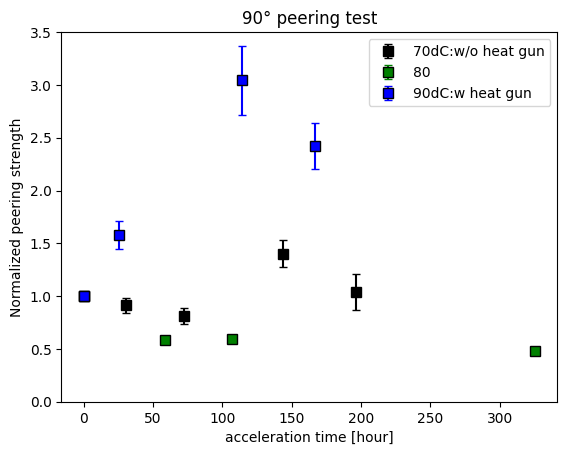

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

T_accel =["70dC","80dC","90dC"]
fig, ax = plt.subplots()
colors = ['black','green','blue','red']
ntemp = T_accel.__len__()
label_list = ['70dC:w/o heat gun' ,'80' ,'90dC:w heat gun' ,'98']

for itemp in range(ntemp):
	temp_accel = T_accel[itemp]
	filename = f'peering_{temp_accel}.csv'
	df = pd.read_csv(filename,sep="\t"
									 ,skiprows=1
									 #,names=['1','2','3','4']
									 ,header=None
									 )
	print("\n",temp_accel,"\n",df)
	#weight_dataset = df.to_numpy()
	#t_accel = weight_dataset[0]
	#weight_break = weight_dataset[1]
	#weight_err = weight_dataset[2]
	#ax.errorbar(t_accel, weight_break, yerr=weight_err, capsize=3, fmt='s'
	#            , ecolor=colors[itemp], color=colors[itemp],ms=7, mec='k'
	#            , label=label_list[itemp])

	weight_dataset = df.to_numpy()
	t_accel = weight_dataset[0]
	initialBreakingWeight = weight_dataset[1][0]
	initialBreakingWeightErr = weight_dataset[2][0]
	breakingWeightRatio = weight_dataset[1]/initialBreakingWeight
	weightRatioErr = breakingWeightRatio*np.sqrt(np.square(weight_dataset[2]/weight_dataset[1])+np.square(initialBreakingWeightErr/initialBreakingWeight))
	weightRatioErr[0] = 0
	print(weightRatioErr)
	ax.errorbar(t_accel, breakingWeightRatio, yerr=weightRatioErr, capsize=3, fmt='s'
				, ecolor=colors[itemp], color=colors[itemp],ms=7, mec='k'
				, label=label_list[itemp])

ax.set_xlabel('acceleration time [hour]')
#ax.set_ylabel('adhesive power [g]')
ax.set_ylabel('Normalized peering strength')
#plt.yscale('log')
plt.legend(loc='upper right')
ax.set_title('90° peering test')
plt.ylim([0,3.5])
plt.show()


標準誤差をスプレッドシートで計算するのが面倒くさい。でも、時間情報をPythonで計算するのも面倒くさそう。


In [11]:
from datetime import datetime

def date_difference_in_hours(date1, date2):
    # 日付文字列をdatetimeオブジェクトに変換
    datetime1 = datetime.strptime(date1, '%Y-%m-%d %H:%M:%S')
    datetime2 = datetime.strptime(date2, '%Y-%m-%d %H:%M:%S')

    # 2つのdatetimeオブジェクトの差を計算
    time_difference = datetime2 - datetime1

    # 差を時間に変換
    hours = time_difference.total_seconds() / 3600

    return hours

# テスト用の日付文字列
date_string1 = '2023-11-22 23:30:50'
date_string2 = '2023-11-23 10:15:30'

# 関数を呼び出して時間に変換
hours_difference = date_difference_in_hours(date_string1, date_string2)

# 結果を表示
print(f"日付1: {date_string1}")
print(f"日付2: {date_string2}")
print(f"時間差: {hours_difference:.2f} 時間")


日付1: 2023-11-22 23:30:50
日付2: 2023-11-23 10:15:30
時間差: 10.74 時間


2 days, 22:51:50
